# A/B Test with Machine Learning

Baru-baru ini, kami membaca [Pengujian A/B dengan Machine Learning - Tutorial Langkah-demi-Langkah](https://www.business-science.io/business/2019/03/11/ab-testing-machine- learning.html) ditulis oleh [Matt Dancho](https://www.linkedin.com/in/mattdancho/) dari [Ilmu Bisnis](https://www.business-science.io). Kami selalu terpesona dengan gagasan **Pengujian A/B** dan besarnya dampak yang dapat ditimbulkannya dalam bisnis. Tutorialnya sangat definitif dan Matt telah menjelaskan setiap langkah dalam tutorial. Dia telah merinci tentang setiap keputusan yang diambil saat mengembangkan solusi.

Meskipun tutorialnya ditulis dalam `R`, Kami menemukan solusi yang menggunakan 'Python' dari [A/B Testing with Machine Learning - A Step-by-Step Tutorial](https://www.business-science.io/business/2019/03/11/ab-testing-machine-learning.html) .

Kami memutuskan untuk mencoba solusi di `Python`.  Namun, ada beberapa perbedaan kecil dalam implementasi kami tetapi itu mungkin dapat diabaikan. Selain anotasi sel, kami belum merinci langkah-langkahnya karena untuk itu Anda harus benar-benar mengikuti artikel yang kami sebutkan.

Disusun Oleh :
* Risya Diany Yulinska (11180910000118)
* Ahmad Malik Fajar (11180910000120)
* Nabila Lailika Amalia (11180910000128)


## Data loading

kita dapat mengimpor data menggunakan fungsi read_csv()

In [28]:
import pandas as pd

control_data = pd.read_csv('data/control_data.csv')
experiment_data = pd.read_csv('data/experiment_data.csv')

In [29]:
control_data.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


In [30]:
experiment_data.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0


## Number summaries and basic investigations

Selanjutnya, mari kita periksa kualitas datanya. proses yang melibatkan:

    - Pemerikasaan Missing Value : Apakah ada nilai yang hilang? Apa yang harus kita lakukan?
    - Pemerikasaan Data Format : Apakah data dalam format yang benar untuk analisis? Apakah semua fitur dibuat dan di kelas yang tepat?

Terdapat 5 kolom yang pada dataset control_data dan experiment_data yang terdiri dari:

    Date: karakter yang diformat Hari, Bulan, dan Hari Bulan
    Pageviews: Jumlah gabungan Tampilan Halaman pada hari tertentu
    Clicks: Jumlah gabungan Klik Halaman pada hari tertentu untuk halaman yang dimaksud
    Enrollments: Jumlah gabungan Pendaftaran menurut hari.
    Payments: Jumlah total Pembayaran menurut hari.

In [31]:
# Mengecek format data
control_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         37 non-null     object 
 1   Pageviews    37 non-null     int64  
 2   Clicks       37 non-null     int64  
 3   Enrollments  23 non-null     float64
 4   Payments     23 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.6+ KB


In [32]:
experiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         37 non-null     object 
 1   Pageviews    37 non-null     int64  
 2   Clicks       37 non-null     int64  
 3   Enrollments  23 non-null     float64
 4   Payments     23 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.6+ KB


Pada pengecekan data diatas bisa dilihat bahwa 
* Date dalam format karakter. Itu tidak berisi informasi tahun. Karena eksperimen hanya dijalankan selama 37 hari, kami hanya dapat menggunakan “Hari dalam Seminggu” secara realistis sebagai prediktor.*
* Kolom lainnya semuanya numerik, tidak apa-apa. Kami akan memprediksi jumlah Pendaftaran (regresi) 
* Payment adalah hasil dari Pendaftaran jadi ini harus dihapus

In [33]:
# Selanjutnya menditeksi missing value menggunakkan fungsi .isna()
control_data.isna().sum()

Date            0
Pageviews       0
Clicks          0
Enrollments    14
Payments       14
dtype: int64

terdapat 14 hari pengamatan yang hilang  yang perlu diselidiki, Mari kita lihat apakah data yang hilang (NA) pada contro data konsisten dalam set eksperimen.

In [34]:
experiment_data.isna().sum()

Date            0
Pageviews       0
Clicks          0
Enrollments    14
Payments       14
dtype: int64

Jumlah data yang hilang konsisten (hal yang baik). Namun masih perlu mencari tahu apa yang terjadi.

In [35]:
control_data[control_data['Enrollments'].isna()]

,Date,Pageviews,Clicks,Enrollments,Payments
23,"Mon, Nov 3",9437,788,NaN,NaN
24,"Tue, Nov 4",9420,781,NaN,NaN
25,"Wed, Nov 5",9570,805,NaN,NaN
26,"Thu, Nov 6",9921,830,NaN,NaN
27,"Fri, Nov 7",9424,781,NaN,NaN
28,"Sat, Nov 8",9010,756,NaN,NaN
29,"Sun, Nov 9",9656,825,NaN,NaN
30,"Mon, Nov 10",10419,874,NaN,NaN
31,"Tue, Nov 11",9880,830,NaN,NaN
32,"Wed, Nov 12",10134,801,NaN,NaN


Setelah di cek ternyata kami tidak memiliki informasi Pendaftaran mulai tanggal 3 November. Kita perlu menghapus pengamatan ini pada tahapan format data.

## Data wrangling

###  1) Format Data

Setelah kita memahami data, mari kita masukkan ke dalam format yang dapat kita gunakan untuk pemodelan. 
Pada tahapan ini Kami akan melakukan hal berikut:

* Gabungkan control_data dan experiment_data, lalu tambahkan kolom “id” yang menunjukkan apakah data tersebut merupakan bagian dari eksperimen atau bukan
* Tambahkan kolom "row_id" untuk membantu melacak baris mana yang dipilih untuk pelatihan dan pengujian di bagian pemodelan
* Buat fitur "Hari dalam Seminggu" dari kolom "Date"
* Hapus kolom "Tanggal" yang tidak perlu dan kolom "Payment"
* Tangani data yang hilang (NA) dengan menghapusnya.
* Acak baris untuk mencampur data untuk dipelajari
* Atur ulang kolom

In [36]:
# Gabungkan dengan data Eksperimen
data_total = pd.concat([control_data, experiment_data])
data_total.sample(10)

,Date,Pageviews,Clicks,Enrollments,Payments
22,"Sun, Nov 2",8836,693,206.0,67.0
19,"Thu, Oct 30",9345,734,167.0,75.0
9,"Mon, Oct 20",10496,860,153.0,98.0
27,"Fri, Nov 7",9272,767,NaN,NaN
24,"Tue, Nov 4",9420,781,NaN,NaN
8,"Sun, Oct 19",8459,691,131.0,60.0
3,"Tue, Oct 14",9867,827,138.0,92.0
25,"Wed, Nov 5",9570,805,NaN,NaN
26,"Thu, Nov 6",9921,830,NaN,NaN
3,"Tue, Oct 14",9871,836,156.0,105.0


In [37]:
import numpy as np
np.random.seed(7)
import sklearn.utils

# Tambahkan row id
data_total['row_id'] = data_total.index

# Buat fitur "Hari dalam Seminggu" dari kolom "Date"
data_total['DOW'] = data_total['Date'].str.slice(start=0, stop=3)

# Menghapus Missing value
data_total.dropna(inplace=True)

# Tambahkan Eksperimen kolom biner untuk menunjukkan apakah data tersebut merupakan bagian dari eksperimen atau tidak (Acak).
data_total['Experiment'] = np.random.randint(2, size=len(data_total))

# Remove missing data
data_total.dropna(inplace=True)

# Hapus kolom Tanggal dan Pembayaran
del data_total['Date'], data_total['Payments']

# Shuffle the data
data_total = sklearn.utils.shuffle(data_total)

In [38]:
# Check data yang baru
data_total.head()

,Pageviews,Clicks,Enrollments,row_id,DOW,Experiment
21,8460,681,156.0,21,Sat,0
3,9867,827,138.0,3,Tue,1
21,8448,695,142.0,21,Sat,0
13,9434,673,220.0,13,Fri,1
6,9008,748,146.0,6,Fri,1


## 2) Training and Testing Sets

Dengan data yang diformat dengan benar untuk analisis, sekarang kita dapat memisahkan menjadi training dan testing set menggunakan rasio 80% / 20%. Kita dapat menggunakan fungsi train_test_Split() dari sklearn.model_selection untuk membuat objek terpisah, kemudian mengekstrak set training() dan testing().

In [39]:
# Susun ulang kolom
data_total = data_total[['row_id', 'Experiment', 'Pageviews', 'Clicks', 'DOW', 'Enrollments']]

In [40]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_total.loc[:, data_total.columns != 'Enrollments'],\
                                                    data_total['Enrollments'], test_size=0.2)

In [41]:
# Mengubah string pada kolom DOW menjadi angka
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
X_train['DOW'] = lb.fit_transform(X_train['DOW'])
X_test['DOW'] = lb.transform(X_test['DOW'])

In [42]:
X_train.head()

,row_id,Experiment,Pageviews,Clicks,DOW
16,16,0,9535,759,1
10,10,1,10551,864,5
2,2,0,10480,884,1
3,3,1,9867,827,5
16,16,0,9655,771,1


In [43]:
X_test.head()

,row_id,Experiment,Pageviews,Clicks,DOW
12,12,0,8324,665,4
18,18,1,9262,727,6
1,1,0,9288,785,3
1,1,0,9102,779,3
19,19,0,9345,734,4


## Helper functions
Kami akan membuat beberapa fungsi pembantu untuk mengurangi kode berulang dan meningkatkan keterbacaan.

- Berfungsi untuk mencetak skor evaluasi terkait dengan _regression_ problem
- Fungsi untuk memplot nilai asli dan nilai yang diprediksi oleh model

In [44]:
# Pertama, kami akan membuat fungsi pelaporan metrik yang disederhanakan
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def calculate_metrics(y_test, y_preds):
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    r_sq = r2_score(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)

    print('RMSE Score: {}'.format(rmse))
    print('R2_Squared: {}'.format(r_sq))
    print('MAE Score: {}'.format(mae))

In [45]:
#Selanjutnya kita dapat membuat fungsi visualisasi yang disederhanakan, menggunakan matplotlib.pyplot
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

def plot_preds(y_test, y_preds, model_name):
    N = len(y_test)
    plt.figure(figsize=(10,5))
    original = plt.scatter(np.arange(1, N+1), y_test, c='blue')
    prediction = plt.scatter(np.arange(1, N+1), y_preds, c='red')
    plt.xticks(np.arange(1, N+1))
    plt.xlabel('# Oberservation')
    plt.ylabel('Enrollments')
    title = 'True labels vs. Predicted Labels ({})'.format(model_name)
    plt.title(title)
    plt.legend((original, prediction), ('Original', 'Prediction'))
    plt.show()

## Linear regression: A baseline

Kami akan membuat model regresi linier menggunakan fungsi _linear_regression()_ yang mengatur mode ke "regresi". 
Kami menggunakan fungsi set_engine() untuk mengatur mesin regresi linier ke lm() dari perpustakaan statistik. 
Akhirnya, kami fit() model dengan data pelatihan yang menetapkan "Enrollment" sebagai target kami. 


In [46]:
import statsmodels.api as sm

X_train_refined = X_train.drop(columns=['row_id'], axis=1)
linear_regression = sm.OLS(y_train, X_train_refined)
linear_regression = linear_regression.fit()

Selanjutnya, kita dapat membuat prediksi pada test set menggunakan _linear_regression.predict()_. 
Kami mengikat prediksi dengan nilai aktual ("Enrollment" dari set tes). 
Kemudian kami menghitung metrik kesalahan menggunakan _calculate_metrics()_ dari paket tolok ukur. 
Kita dapat melihat bahwa model ini berhenti sekitar +/-19 _Enrollments on average_.

In [47]:
X_test_refined = X_test.drop(columns=['row_id'], axis=1)
y_preds = linear_regression.predict(X_test_refined)

In [48]:
calculate_metrics(y_test, y_preds)

RMSE Score: 23.988871314039933
R2_Squared: 0.050950018270387254
MAE Score: 19.58606183877512


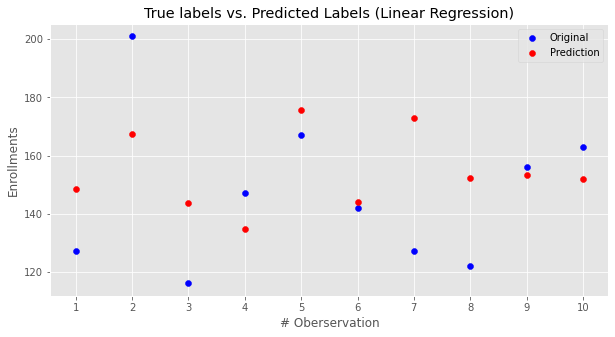

In [49]:
# Kita dapat menyelidiki prediksi dengan memvisualisasikannya menggunakan plot_preds().
plot_preds(y_test, y_preds, 'Linear Regression')

Setelah memformat dan memplot data, kita dapat melihat bahwa model memiliki masalah dengan Observations ke-7, yang kemungkinan menjadi alasan rendahnya nilai R2-Squared (Test set).

In [50]:
print(linear_regression.summary())

                                 OLS Regression Results                                
Dep. Variable:            Enrollments   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              400.1
Date:                Sun, 20 Jun 2021   Prob (F-statistic):                    7.92e-27
Time:                        22:17:49   Log-Likelihood:                         -163.65
No. Observations:                  36   AIC:                                      335.3
Df Residuals:                      32   BIC:                                      341.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Eksperimen dinilai sebagai prediktor kuat dengan nilai p kurang dari 0,05. 
Namun, kami ingin mencoba teknik pemodelan lain untuk menilai ini. Kami mencatat bahwa koefisien Eksperimen adalah -17,6, dan karena sukunya biner (0 atau 1), ini dapat diartikan sebagai penurunan Pendaftaran sebesar -17,6 per hari saat Eksperimen dijalankan.

In [51]:
#Kami mereset index dan mengurutkan hasil p_value.
pd.DataFrame(linear_regression.pvalues)\
    .reset_index()\
    .rename(columns={'index':'Terms', 0:'p_value'})\
    .sort_values('p_value')

,Terms,p_value
1,Pageviews,1.974764e-07
2,Clicks,3.804647e-05
3,DOW,2.299762e-01
0,Experiment,8.634578e-01


## Model 02: Decision Tree

Decision Tree adalah model yang sangat baik yang dapat menangkap non-linearitas dan sering kali membuat model yang sangat informatif yang melengkapi model linier dengan memberikan cara yang berbeda untuk melihat masalah.

Kita dapat mengimplementasikan Decision Tree dengan decision_tree(). Kami akan mengatur mesin ke "rpart", paket pohon keputusan yang populer. 
Ada beberapa parameterutama:
* random_state: Batas untuk pemisahan model berdasarkan peningkatan kemampuan untuk dijelaskan
* max_depth: Kedalaman pohon maksimum
* min_samples_leafmin_n: Jumlah minimum pengamatan di simpul terminal (daun)

Parameter yang dipilih untuk model ditentukan menggunakan validasi silang 5 kali lipat untuk mencegah over-fitting. 


In [52]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=5, min_samples_leaf =4, random_state=7)
dtree.fit(X_train_refined, y_train)
y_preds = dtree.predict(X_test_refined)

calculate_metrics(y_test, y_preds)

RMSE Score: 26.8540034259326
R2_Squared: -0.1892893660531696
MAE Score: 21.78333333333333


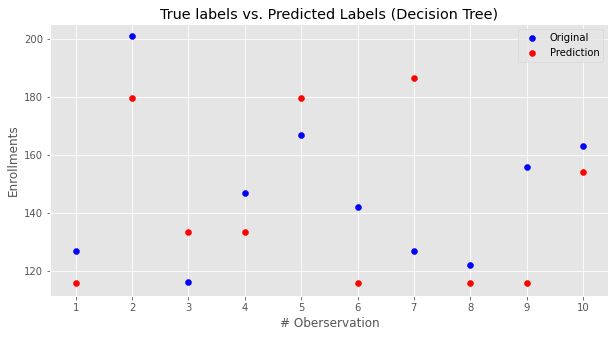

In [53]:
plot_preds(y_test, y_preds, 'Decision Tree')

## Decision tree visualization

In [54]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data, 
                feature_names=X_train_refined.columns,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

ModuleNotFoundError: No module named 'sklearn.externals.six'

Menafsirkan pohon keputusan sangatlah mudah: Setiap keputusan adalah aturan, dan Ya di sebelah kiri, Tidak di sebelah kanan. Fitur teratas adalah yang paling penting untuk model (“Tayangan Laman” dan “Klik”). Pohon keputusan menunjukkan bahwa "Eksperimen" terlibat dalam aturan keputusan. Aturan menunjukkan ketika Eksperimen >= 0,5, ada penurunan pendaftaran.

## Model 03: `XGBoost`

In [55]:
import xgboost as xgb

In [56]:
DM_train = xgb.DMatrix(data=X_train_refined,label=y_train)
DM_test = xgb.DMatrix(data=X_test_refined,label=y_test)

In [57]:
parameters = {
    'max_depth': 6,
    'objective': 'reg:linear',
    'booster': 'gblinear',
    'n_estimators': 1000,
    'learning_rate': 0.2,
    'gamma': 0.01,
    'random_state': 7,
    'subsample': 1.
}

In [58]:
parameters = {
    'max_depth': 6,
    'objective': 'reg:linear',
    'booster': 'gblinear',
    'n_estimators': 1000,
    'learning_rate': 0.2,
    'gamma': 0.01,
    'random_state': 7,
    'subsample': 1.
}

In [59]:
xg_reg = xgb.train(params = parameters, dtrain=DM_train, num_boost_round=8)
y_preds = xg_reg.predict(DM_test)

[22:34:24] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:34:24] WARNING: ..\src\learner.cc:541: 
Parameters: { gamma, max_depth, n_estimators, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [60]:
calculate_metrics(y_test, y_preds)

RMSE Score: 20.820465561137407
R2_Squared: 0.28509171749042017
MAE Score: 18.291917419433595


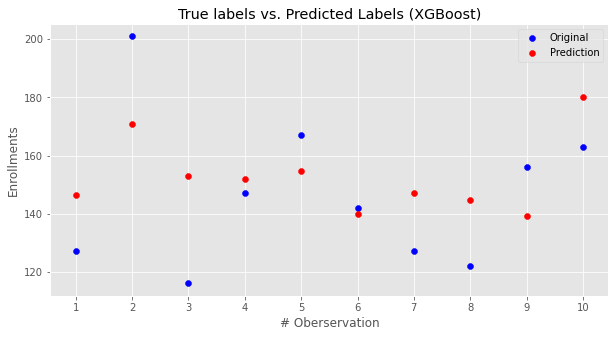

In [61]:
plot_preds(y_test, y_preds, 'XGBoost')

> I used a `gblinear` booster for XGBoost and XGBoost currently does support feature importances linear models.